In [1]:
import pandas as pd
from matplotlib import pyplot as pl 

# Netflix Univariate Analysis

In [2]:
nf = pd.read_csv("../Opdracht_4/netflix_titles.csv", sep=",")

In [3]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
nf.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

## Hoeveel verschillende soorten films zijn er
Weergegeven in een circeldiagram

<AxesSubplot:>

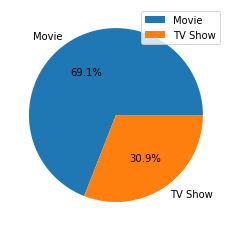

In [5]:
nf.type.value_counts().plot(kind="pie", autopct="%.1f%%", legend=True, ylabel="")

## Welke directors hebben hoeveel films gemaakt

In [6]:
films = nf[(nf.director.isna() == False) 
                        & (nf.country == "Netherlands")]

<AxesSubplot:>

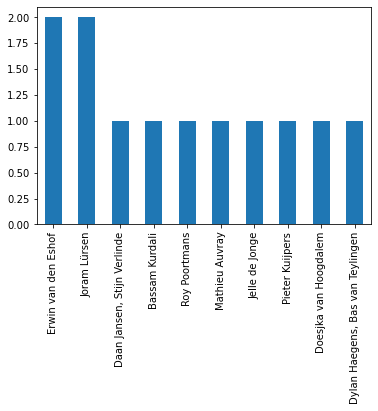

In [7]:
films.director.value_counts().plot(kind="bar")

## Hoeveel films zijn er per jaar gemaakt

In [8]:
years = nf.release_year.unique()
filmsList = []

years.sort()

for year in years:
    amount = len(nf[nf.release_year == year])
    filmsList.append(amount)

Text(0.5, 1.0, 'Amount of films per year')

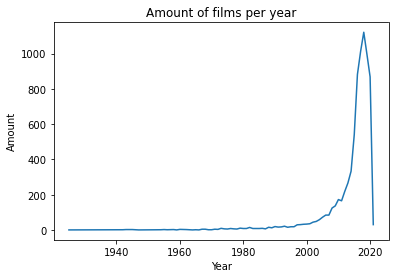

In [9]:
pl.plot(years, filmsList)
pl.xlabel("Year")
pl.ylabel("Amount")
pl.title("Amount of films per year")

## Hoeveel films hebben welke rating

<AxesSubplot:>

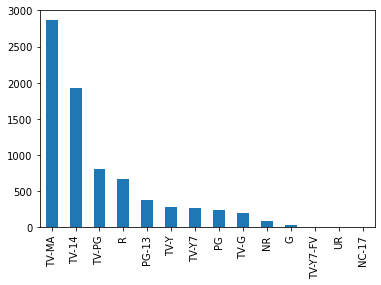

In [10]:
nf.rating.value_counts().plot(kind = 'bar')

## Hoelang zijn de films

In [11]:
def convertString(str):
    return int(str.split(" ")[0])

In [12]:
durations = nf.duration[nf.type == "Movie"]

converted_durations = []

for v in durations:
    converted_durations.append(convertString(v))

Text(0, 0.5, 'Amount')

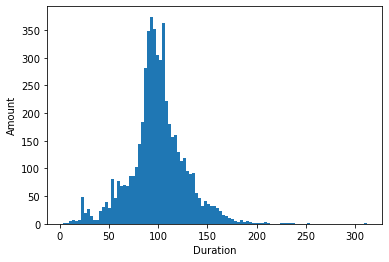

In [13]:
pl.hist(converted_durations, bins=101)
pl.xlabel("Duration")
pl.ylabel("Amount")

## Boxplot van de uitgebrachte zonder uitschieters

In [14]:
round(nf.release_year.mean(), 2)

2013.93

In [15]:
nf.release_year.median()

2017.0

In [16]:
round(nf.release_year.std(), 2)

8.76

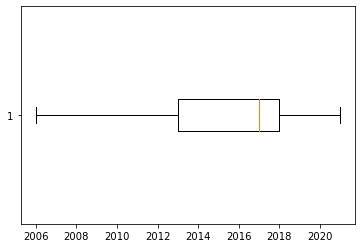

In [17]:
pl.boxplot(nf.release_year, vert=False, showfliers=False)
pl.show()

# Durations

Gemiddelde van durations (converted)

In [18]:
drt = pd.DataFrame(converted_durations)

In [19]:
drt.mean()

0    99.307978
dtype: float64

Mediaan van durations (converted)

In [20]:
drt.median()

0    98.0
dtype: float64

Standaartafwijking van durations (converted)

In [21]:
drt.std()

0    28.530881
dtype: float64

## Boxplot van de duur van films zonder uitschieters

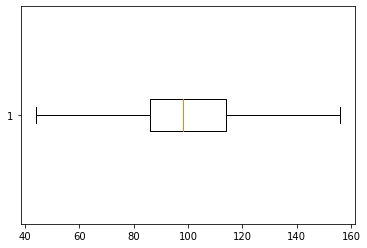

In [22]:
pl.boxplot(converted_durations, vert=False, showfliers=False)
pl.show()